In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def salt_pepper(img,p):
    result = np.zeros(img.shape,np.uint8)
    thres = 1-p
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            rnd = np.random.rand()
            if(rnd<p):
                result[i][j] = 0
            elif(rnd>thres):
                result[i][j] = 255
            else:
                result[i][j] = img[i][j]
    return result

In [3]:
def PSNR(img1,img2):
    img1 = img1.astype(np.float64)/255.
    img2 = img2.astype(np.float64)/255.
    
    MSE = np.mean((img1-img2)**2)
    if(MSE == 0):
        return 100
    PIXEL_MAX = 1.0
    return 20*np.log10(PIXEL_MAX/np.sqrt(MSE))

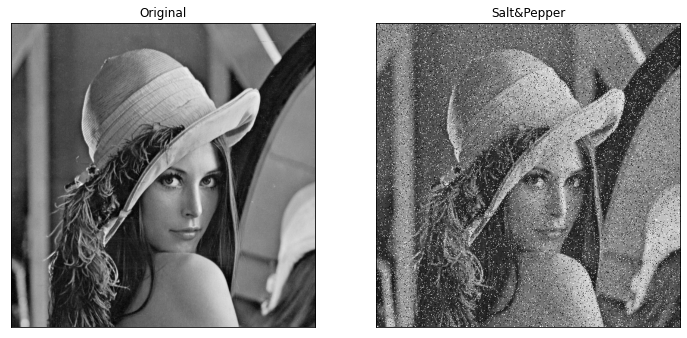

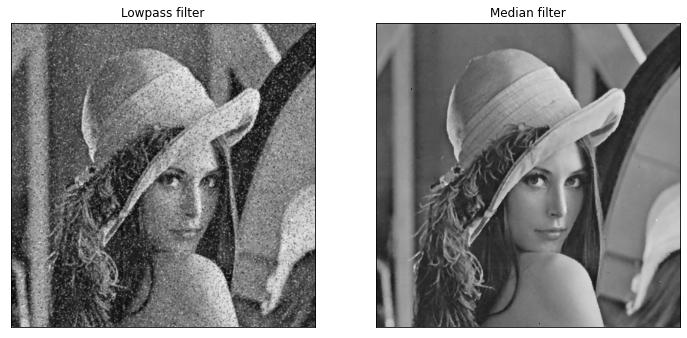

Noisy image PSNR: 15.416981224632899
Lowpass filter image PSNR: 23.20588990253658
Median filter image PSNR: 32.92999600914614
<class 'numpy.ndarray'>


In [5]:
tiff_img = cv2.imread("C:\\Work\\Python\\Image_processing\\lena.tiff",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(tiff_img,cv2.COLOR_RGB2GRAY)
height, width = gray_img.shape

s_noise = salt_pepper(gray_img,0.05)
s_img = np.clip(s_noise,0,255).astype(np.uint8)
s_img_pad = cv2.copyMakeBorder(s_img,1,1,1,1,cv2.BORDER_REPLICATE)

filter_3x3 = (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])

s_lowpass = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        s_lowpass[i][j] = np.sum(s_img_pad[i:i+3,j:j+3] * filter_3x3)

s_median = cv2.medianBlur(s_img,3)

rows = 1
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(gray_img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(s_img_pad,cmap='gray')
axes[1].set_title('Salt&Pepper')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

rows = 1
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(s_lowpass,cmap='gray')
axes[0].set_title('Lowpass filter')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(s_median,cmap='gray')
axes[1].set_title('Median filter')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

print(f"Noisy image PSNR: {PSNR(s_img,gray_img)}")
print(f"Lowpass filter image PSNR: {PSNR(s_lowpass,gray_img)}")
print(f"Median filter image PSNR: {PSNR(s_median,gray_img)}")


print(type(s_lowpass))
#print(f"Noisy image PSNR: {cv2.PSNR(s_img,gray_img)}")
#print(f"Lowpass filter image PSNR: {cv2.PSNR(s_lowpass,gray_img)}")
#print(f"Median filter image PSNR: {cv2.PSNR(s_median,gray_img)}")

In [27]:
#print(np.mean(s_img_pad))
print(gray_img.shape)
print(s_img_pad.shape)
print(s_lowpass.shape)
print(s_median.shape)

print(type(gray_img))
print(type(s_lowpass))

(512, 512)
(514, 514)
(512, 512)
(512, 512)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


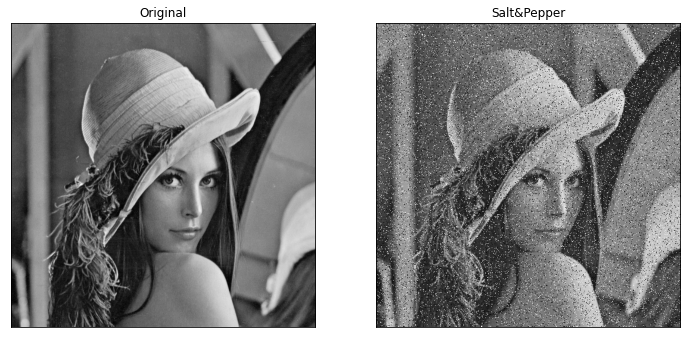

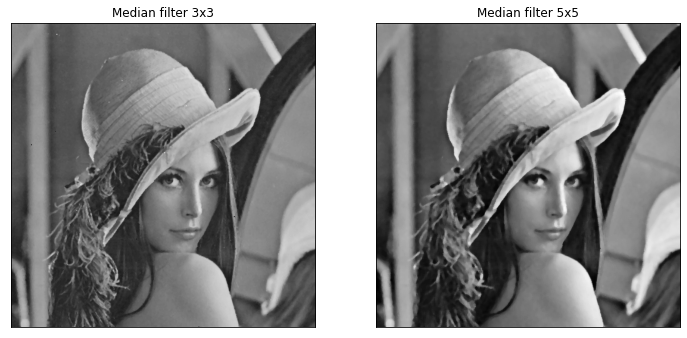

Noisy image PSNR: 15.46788174537503
Lowpass filter image PSNR: 23.297638379909017
Median filter image PSNR: 33.01463326284094


In [42]:
tiff_img = cv2.imread("C:\\Work\\Python\\Image_processing\\lena.tiff",cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(tiff_img,cv2.COLOR_RGB2GRAY)
height, width = gray_img.shape

s_noise = salt_pepper(gray_img,0.05)
s_img = np.clip(s_noise,0,255).astype(np.uint8)
s_img_pad = cv2.copyMakeBorder(s_img,1,1,1,1,cv2.BORDER_REPLICATE)

filter_3x3 = (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])

s_lowpass = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        s_lowpass[i][j] = np.sum(s_img_pad[i:i+3,j:j+3] * filter_3x3)

s_median = cv2.medianBlur(s_img,3)
s_median_5 = cv2.medianBlur(s_img,5)

rows = 1
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(gray_img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(s_img_pad,cmap='gray')
axes[1].set_title('Salt&Pepper')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

rows = 1
cols = 2
fig, axes = plt.subplots(rows,cols,figsize=(12,6))

axes[0].imshow(s_median,cmap='gray')
#axes[0].set_title('Lowpass filter')
axes[0].set_title('Median filter 3x3')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(s_median_5,cmap='gray')
#axes[1].set_title('Median filter')
axes[1].set_title('Median filter 5x5')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

print(f"Noisy image PSNR: {PSNR(s_img,gray_img)}")
print(f"Lowpass filter image PSNR: {PSNR(s_lowpass,gray_img)}")
print(f"Median filter image PSNR: {PSNR(s_median,gray_img)}")